In [1]:
# Import basic modeuls
import os
import subprocess
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact

In [2]:
# Notebook plot settings
import seaborn as sns
sns.set_theme()
sns.set_style("ticks")
sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
# Import local modules (except EDA)
import data_io as io
import data_dictionary as dd
import data_transform as dt
import feature_selection as fs
import mmm_modeling as mmm

# Define Base Path

In [4]:
path_base = '.'
input_dir = '/input'
output_dir = '/output'

In [5]:
filename_read = '3_Adidas_Weekly.csv'
path_read = os.path.join(path_base + input_dir, filename_read)

In [6]:
df_input = io.read_file(path_read).reset_index().drop('index', axis=1)

# 1. Data Dictionary

## Define input/output

In [7]:
file_input_dd = '3_Adidas_Weekly.csv'
path_input_dd = os.path.join(path_base + input_dir, file_input_dd)
path_output_tmp = path_base + output_dir + '/dd'
path_output_dd = path_base + output_dir + '/data_dictionary_final'

In [8]:
df_input_dd = io.read_file(path_input_dd, file_format='csv') # read the input file

## Create Data Dictionary

In [9]:
%%timeit -r1 -n1

dd.create_data_dictionary(df_input_dd, path_output_dd, import_desc='yes', import_var_types='yes', path_to_write=path_output_tmp)

Please enter the column descriptions/variable_type in the mentioned temporary file.
The file has been successfully written to ./output/dd.csv


To upload, please enter 'done' in the box below:done

Index([0], dtype='int64')
0    12-30-2018
1    01-06-2019
2    01-13-2019
3    01-20-2019
4    01-27-2019
Name: Date, dtype: object
Date
Done writing description for Date
Done writing variable type for Date

Index([1], dtype='int64')
0    13152442794
1    15207707736
2    15207707736
3    15207707736
4    15427886954
Name: KPI_Total_Sales, dtype: int64
KPI_Total_Sales
Done writing description for KPI_Total_Sales
Done writing variable type for KPI_Total_Sales

Index([2], dtype='int64')
0    63
1    65
2    61
3    77
4    53
Name: KPI_TotalSearch_queries, dtype: int64
KPI_TotalSearch_queries
Done writing description for KPI_TotalSearch_queries
Done writing variable type for KPI_TotalSearch_queries

Index([3], dtype='int64')
0    0
1    0
2    0
3    0
4    0
Name: Dummy_Winter_Olympics, dtype

Index([37], dtype='int64')
0    159
1      3
2      0
3     23
4     65
Name: PR_Press_Release_#_of_Coverage, dtype: int64
PR_Press_Release_#_of_Coverage
Done writing description for PR_Press_Release_#_of_Coverage
Done writing variable type for PR_Press_Release_#_of_Coverage

Index([38], dtype='int64')
0    53212442.0
1     1654919.0
2           0.0
3     7515000.0
4    20500000.0
Name: PR_Press_Release_Impression, dtype: float64
PR_Press_Release_Impression
Done writing description for PR_Press_Release_Impression
Done writing variable type for PR_Press_Release_Impression

Index([39], dtype='int64')
0    0
1    0
2    0
3    0
4    0
Name: PR_Media_Event_#_of_Coverage, dtype: int64
PR_Media_Event_#_of_Coverage
Done writing description for PR_Media_Event_#_of_Coverage
Done writing variable type for PR_Media_Event_#_of_Coverage

Index([40], dtype='int64')
0    0
1    0
2    0
3    0
4    0
Name: PR_Media_Event_Spend, dtype: int64
PR_Media_Event_Spend
Done writing description for PR_Media_

ValueError: Cannot describe a DataFrame without columns

# 2. Explolatory Data Analysis

## Univariate EDA

In [10]:
%run -i 'eda_univariate'

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'eda_univariate'
 * Debug mode: on


/home/pgoel/Fresh_MMM_run/eda_univariate.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/pgoel/Fresh_MMM_run/eda_univariate.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/pgoel/Fresh_MMM_run/eda_univariate.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/pgoel/Fresh_MMM_run/eda_univariate.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

## Bivariate EDA

In [9]:
%run -i 'eda_bivariate'

Dash is running on http://127.0.0.1:8051/

 * Serving Flask app 'eda_bivariate'
 * Debug mode: on


# 3. Data Transformation (ASL)

In [10]:
# dictionary of specific params for the asl transformation on a particular column
dict_params_asl = {
    'retention': 0.6,
    'shape': 3,
    'steepness': 50000,
    'lag': 2,
    'adstock_col': None, 
    'saturation_col': None,
    'lag_col': None,
    'lst_new_col_names_ads': None,
    'lst_new_col_names_sat': None,
    'lst_new_col_names_lag': None,
    'keep_input_col': True, 
    'keep_intermediate_col': True
}

In [11]:
# dictionary of all trial values of params for asl transformations on a list of variables
# if params are not separately given for a particular variable, then default values are used
# if different params are to be used for a variable, copy the param-set for any variable and make changes

dict_params_asl_trial = {
    'default': {
        'retention': {
            'start': 0.05,
            'end': 0.95,
            'step_size': 0.05
        },
        'shape': {
            'start': 2,
            'end': 4,
            'step_size': 0.2
        },
        'steepness': {
            'start': lambda x: x.where(x.gt(0)).min(0),
            'end': lambda x: 2*sum(x),
            'num_steps': 21
        },
        'lag': {
            'start': 0,
            'end': 3,
            'step_size': 1
        },
        'other_params': {    
            'adstock_col': None, 
            'saturation_col': None,
            'lag_col': None,
            'lst_new_col_names_ads': None,
            'lst_new_col_names_sat': None,
            'lst_new_col_names_lag': None,
            'keep_input_col': False, 
            'keep_intermediate_col': False
        }
    }   
}

In [12]:
# Create list for which ASL needs to be created
#lst_var = ['Digital_Display_Impression']
lst_var = ['Digital_Display_Impression', 'Digital_Social_Impression', 'Digital_Video_Impression', 'Digital_Search_Impression']
path_write = path_base + output_dir

### Create input for ASL / Change Granularity

It's possible that one might want to compute ASL transformations on a different granularity than the earlier input used for DD/EDA. The granularity should be changed here, before calling ASL, or new input should be read from an external file.

In [13]:
filename_read = '4_Adidas_Monthly.csv'
path_read = os.path.join(path_base + input_dir, filename_read)
df_input = io.read_file(path_read).reset_index().drop('index', axis=1)

## Test: Specific ASL Combination

In [14]:
%%timeit -r1 -n1

for var in lst_var: 
    result = dt.asl_col(df_input, var, dict_params_asl)
    pprint(result)

    Digital_Display_Impression  Digital_Display_Impression_asl_0.6   
0                     64288429                        6.428843e+07  \
1                    438849543                        4.774226e+08   
2                    398242067                        6.846956e+08   
3                    596549657                        1.007367e+09   
4                    714160457                        1.318581e+09   
5                    846851768                        1.638000e+09   
6                    539311664                        1.522112e+09   
7                    446229726                        1.359497e+09   
8                    501217631                        1.316916e+09   
9                    744945401                        1.535095e+09   
10                   374236416                        1.295293e+09   
11                   451336673                        1.228513e+09   
12                   492008563                        1.229116e+09   
13                  

## Test: Specific ASL Combination

In [15]:
%%timeit -r1 -n1

dt.run_asl_combinations(df_input, lst_var, dict_params_asl_trial, path_write)

  0%|          | 0/4 [00:00<?, ?it/s]

['Digital_Display_Impression', 'Digital_Social_Impression', 'Digital_Video_Impression', 'Digital_Search_Impression']
Running ASL combinations for:  Digital_Display_Impression

The file has been successfully written to ./output/Digital_Display_Impression.csv
['Digital_Display_Impression', 'Digital_Social_Impression', 'Digital_Video_Impression', 'Digital_Search_Impression']
Running ASL combinations for:  Digital_Social_Impression

The file has been successfully written to ./output/Digital_Social_Impression.csv
['Digital_Display_Impression', 'Digital_Social_Impression', 'Digital_Video_Impression', 'Digital_Search_Impression']
Running ASL combinations for:  Digital_Video_Impression

The file has been successfully written to ./output/Digital_Video_Impression.csv
['Digital_Display_Impression', 'Digital_Social_Impression', 'Digital_Video_Impression', 'Digital_Search_Impression']
Running ASL combinations for:  Digital_Search_Impression

The file has been successfully written to ./output/Digita

# 4. Feature Selection

## Media variables spends order

This module is used to get a dictionary in which media variables are listed in order of highest to lowest spends. This dictionary can be used as an input to stepwise regression in modeling. This information, along with the percentage spends, is also written to a file named _spends_distribution.csv_.

In [16]:
forward_selection_spends = fs.get_media_spends_order(spend_keyword='Spend')

The file has been successfully written to ./fresh_run_jun23/spends_distribution.csv


In [17]:
pprint(forward_selection_spends)

OrderedDict([('Digital_Display_Spend', None),
             ('Digital_Search_Spend', None),
             ('Digital_Social_Spend', None),
             ('Digital_Video_Spend', None),
             ('Consumer_Activation_Total_Spend', None),
             ('Offline_TV_Total_Spends', None),
             ('CRM_Kakao_Message_Spending', None),
             ('Offline_OOH_Product_Spends', None),
             ('PR_Media_Event_Spend', None),
             ('Offline_OOH_Branding_Spends', None),
             ('Influencer_All_Branding_Spend', None),
             ('Digital_Video_IPTV_Total_Spend', None)])


## Random Forest and Boruta based Feature Importance for Media Variables

In [19]:
rf_ordered_dict, boruta_rf_df = fs.media_variables_importance(lst_var)

                      Feature  Gini_importance_RF  Boruta_Rank  Support   
0   Digital_Social_Impression            0.450997            1     True  \
1    Digital_Video_Impression            0.208879            1     True   
2   Digital_Search_Impression            0.175279            2    False   
3  Digital_Display_Impression            0.164845            1     True   

   Weak_Support  
0         False  
1         False  
2         False  
3         False  
The file has been successfully written to ./fresh_run_jun23/media_feature_importance.csv


In [20]:
pprint(rf_ordered_dict)

OrderedDict([('Digital_Social_Impression', None),
             ('Digital_Video_Impression', None),
             ('Digital_Search_Impression', None),
             ('Digital_Display_Impression', None)])


In [21]:
boruta_rf_df

,Feature,Gini_importance_RF,Boruta_Rank,Support,Weak_Support
0,Digital_Social_Impression,0.450997,1,True,False
1,Digital_Video_Impression,0.208879,1,True,False
2,Digital_Search_Impression,0.175279,2,False,False
3,Digital_Display_Impression,0.164845,1,True,False


## Individual media variables feature importance for ASL combinations

In [22]:
asl_feature_importances = fs.individual_media_asl_importances(lst_var, 20, path_write)

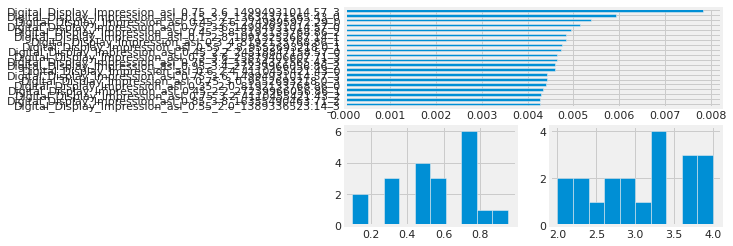

In [23]:
fs.plot_asl_importance(asl_feature_importances, lst_var[0])

# 5. Modeling

## Forward Selection (Stepwise Regression)

In [19]:
forward_selection_variables = rf_ordered_dict.copy()

### Iteration 1

In [20]:
mmm.forward_selection_media_variables(forward_selection_variables)


Adding feature to the model:  Digital_Social_Impression

This is the first run of forward selection!


Building Regression Models: 18392it [00:31, 592.30it/s]                                                                                                                   


All models done, out of for loop


### Iteration 2

For the next iteration, choose best model from previous iteration and add it to the forward selection dictionary!

In [21]:
forward_selection_variables['Digital_Social_Impression'] = 12

In [23]:
pprint(forward_selection_variables)

OrderedDict([('Digital_Social_Impression', 12),
             ('Digital_Video_Impression', None),
             ('Digital_Search_Impression', None),
             ('Digital_Display_Impression', None)])


In [24]:
mmm.forward_selection_media_variables(forward_selection_variables)


Adding feature to the model:  Digital_Video_Impression



Building Regression Models: 18392it [00:40, 451.76it/s]                                                                                                                   


All models done, out of for loop


## Custom Model Build

### Create list of all variables - media asl + other variables

In [4]:
media_variables  = ['Digital_Social_Impression_asl_1_1_1_0']
                    #'Digital_Video_Impression_asl_0.15_2.8_1828096186_0']
#comp_variables =  ['Competition_Offline_Under_Armour_TVGRPs_asl_0.05_2.0_121.81_2',
#                  'Competition_Offline_Descente_TVGRPs_asl_0.95_3.6_107.91_3']
comp_variables = []
other_variables = []
#other_variables = ['Holiday_Christmas_Day', 'Macro_COVID_Shincheonji', 'Holiday_Chuseok',  'Holiday_Independent_Day']
list_of_variables = {'media': media_variables,
                     'competitor': comp_variables,
                     'others': other_variables}
pprint(list_of_variables)

{'competitor': [],
 'media': ['Digital_Social_Impression_asl_1_1_1_0'],
 'others': []}


In [5]:
output_path = './output/model_output'

In [6]:
# Build model
mmm.custom_variables_model(list_of_variables, output_path)

                            OLS Regression Results                            
Dep. Variable:        KPI_Total_Sales   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.105
Date:                Mon, 26 Jun 2023   Prob (F-statistic):             0.0870
Time:                        14:23:44   Log-Likelihood:                -881.07
No. Observations:                  36   AIC:                             1766.
Df Residuals:                      34   BIC:                             1769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------